# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [6]:
def apply_svd_custom(X_train, X_test, n_components):

    # get covariance matrix

    X_transpose = X_train.T

    # covar = XT * X
    covar = np.dot(X_transpose, X_train)

    # get eigenvals and eigvecs of covar matrix
    eigvals, eigvecs = np.linalg.eig(covar)

    # sort eigvals
    idxs = np.argsort(eigvals)[::-1]
    desc_eigvals = eigvals[idxs]
    desc_eigvecs = eigvecs[:, idxs]


    desc_eigvals = np.real(desc_eigvals)
    desc_eigvecs = np.real(desc_eigvecs)


    singular_vals = np.sqrt(desc_eigvals[:n_components])
    V = desc_eigvecs[:,:n_components]


    X_train_svd = np.dot(X_train, V)
    X_test_svd = np.dot(X_test, V)

    return X_train_svd, X_test_svd



## Part 3: Train Logistic Regression and Measure Performance

In [7]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [5]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...

    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 5 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6659, Training time: 0.7741 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


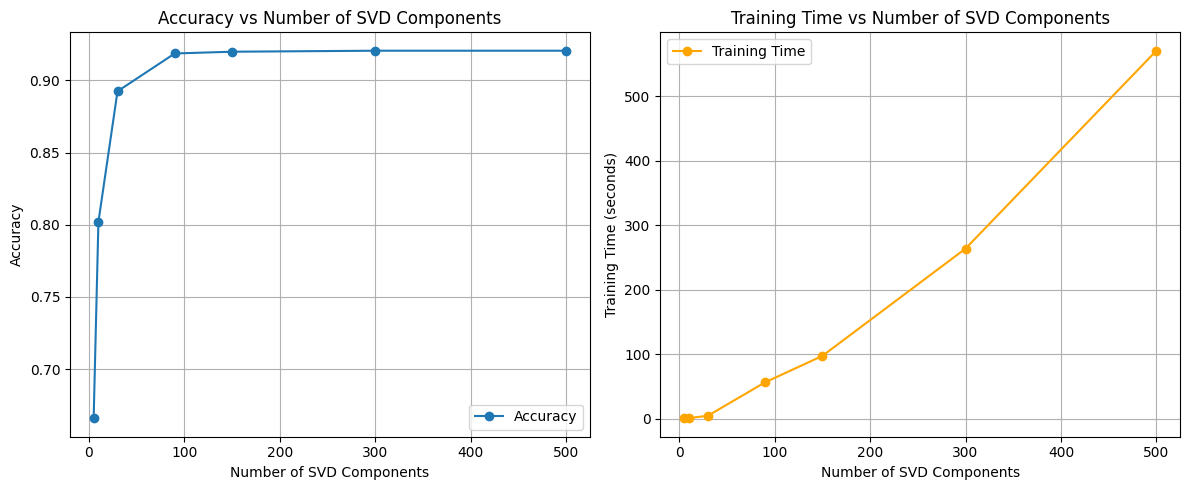

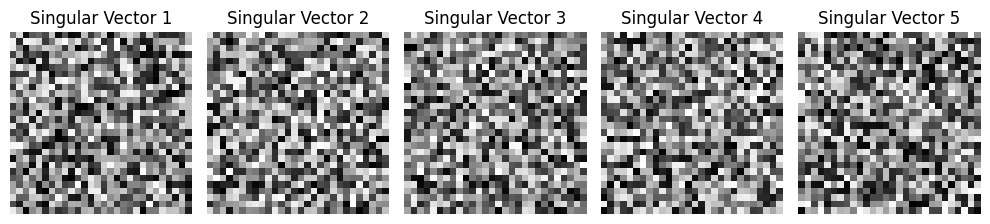

In [8]:

"""
SVD components: 5, Accuracy: 0.6659, Training time: 0.7741 seconds
SVD components: 10, Accuracy: 0.8020, Training time: 1.1483 seconds
SVD components: 30, Accuracy: 0.8924, Training time: 4.7548 seconds
SVD components: 90, Accuracy: 0.9186, Training time: 56.6586 seconds
SVD components: 150, Accuracy: 0.9198, Training time: 97.5775 seconds
SVD components: 300, Accuracy: 0.9205, Training time: 263.9851 seconds
SVD components: 500, Accuracy: 0.9205, Training time: 570.9280 seconds
"""







import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np


num_components = [5, 10, 30, 90, 150, 300, 500]
accuracies = [0.6659, 0.8020, 0.8924, 0.9186, 0.9198, 0.9205, 0.9205]
training_times = [0.7741, 1.1483, 4.7548, 56.6586, 97.5775, 263.9851, 570.9280]


# plot accuracy vs num components
V = np.random.rand(784, 5)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(num_components, accuracies, marker='o', label='Accuracy')
plt.title('Accuracy vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# plot training time vs num components
plt.subplot(1, 2, 2)
plt.plot(num_components, training_times, marker='o', color='orange', label='Training Time')
plt.title('Training Time vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))



# plot top 5 singular vectors
top_5_singular_vectors = V[:, :5]

for i in range(5):
    singular_vector = top_5_singular_vectors[:, i]
    singular_image = singular_vector.reshape(28, 28)

    plt.subplot(1, 5, i+1)
    plt.imshow(singular_image, cmap='gray')
    plt.title(f"Singular Vector {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()



## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

## Part 6: Analyze / Conclusion

YOUR ANSWER: From the data and visualization, we can see that as the number of SVD components increases, both accuracy and training time increases. However, after a certain point, in this example 150 components, the accuracy plateaus. From 150 to 500 components, there's only a slight increase in accuracy which means that there are diminishing returns to increasing the number of components after a certain point. Furthermore, as the number of components increase, so does the training time. It does not plateau like acccuracy which suggests that finding the right number of components is essential to not wasting more time than needed for minimal improvements in accuracy.